In [ ]:
import numpy as np
from numpy.random import randn

from scipy.signal import savgol_filter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter, find_peaks, peak_prominences

import lightgbm as lgb
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Mineral from Mica Library

Minerals

In [ ]:
# # Mg-Carbonate
# df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_mg_carbonate.tab")

# # Mg-Smectite
# df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_mg_smectite.tab")

# # PHS
# df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_poly_hyd_sulf.tab")

# # Low-Ca Pyroxene
# df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_lcp.tab")

# # Hydrated Silica
# df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_hydrated_silica.tab")

# # CO2 ice
df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_co2_ice.tab")

In [ ]:
df.columns =['Wavelength','Ratioed I/F Corrected','Ratioed I/F','Numerator I/F Corrected','Numerator I/F', 'Denominator I/F Corrected', 'Denominator I/F']

df_W = pd.read_csv("/content/drive/MyDrive/Data and Resources for Major Project/Labels Classified Data (CRISM)/Wavelength.csv")

df_WT = df_W.copy()

df_W = df_W.T
df_W.columns=['Wavelength']

In [ ]:
df.drop(['Ratioed I/F','Numerator I/F Corrected','Numerator I/F', 'Denominator I/F Corrected', 'Denominator I/F'],axis=1)

,Wavelength,Ratioed I/F Corrected
0,0.44263,1.81144
1,0.44914,1.78530
2,0.45564,1.74765
3,0.46215,1.72276
4,0.46865,1.70301
...,...,...
474,3.87006,0.44840
475,3.87673,0.42027
476,3.88341,0.39597
477,3.89008,0.37935


In [ ]:
# Define the range of values to filter on
lower_range = 1.0210
upper_range = 2.6483

# Filter the data frame based on the value range
df_filtered = df[(df['Wavelength'] >= lower_range) & (df['Wavelength'] <= upper_range)]
df = df_filtered.drop(['Wavelength','Ratioed I/F','Numerator I/F Corrected','Numerator I/F', 'Denominator I/F Corrected', 'Denominator I/F'], axis=1)

# Print the filtered data frame
df = df.reset_index()['Ratioed I/F Corrected']
df

0      1.12705
1      1.12502
2      1.12372
3      1.12280
4      1.12040
        ...   
235    0.32271
236    0.31062
237    0.30549
238    0.30618
239    0.30599
Name: Ratioed I/F Corrected, Length: 240, dtype: float64

In [ ]:
df_mica = pd.DataFrame(df)
df_mica

,Ratioed I/F Corrected
0,1.12705
1,1.12502
2,1.12372
3,1.12280
4,1.12040
...,...
235,0.32271
236,0.31062
237,0.30549
238,0.30618


# Importing Generator for the generated data of the mineral

In [ ]:
# importing the model
epochs = 100
latent_dim = 10
samples = 200

In [ ]:
# # Mg-Carbonate
# path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/Mg Carbonate (30)/generator_{epochs}.h5"

# # Mg-Smectite
# path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/MgSmectite (07)/generator_{epochs}.h5"

# # PHS
# path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/PHS (19)/generator_{epochs}.h5"

# # Low-Ca Pyroxene
# path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/Low-Ca Pyroxene (33)/generator_{epochs}.h5"

# Hydrated Silica
# path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/Hydrated Silica (27)/generator_{epochs}.h5"

# # CO2 ice
path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/CO2-ice (02)/generator_{epochs}.h5"

In [ ]:
# Data
model = load_model(path_model, compile=False)
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f2133165a90>>

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):

    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# generate data
latent_points = generate_latent_points(latent_dim, samples)

X = model.predict(latent_points)

7/7 [==============================] - 0s 13ms/step


In [ ]:
mineral = X.reshape(samples, 240)
mineral.shape

(200, 240)

In [ ]:
df_mineral = pd.DataFrame(mineral)
df_mineral

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.991022,0.992733,0.992442,0.994415,0.994851,0.995336,0.995838,0.996001,0.995213,0.995198,...,0.783121,0.777319,0.722088,0.609215,0.627219,0.604975,0.629646,0.622511,0.613584,0.606752
1,0.973520,0.978088,0.977330,0.981655,0.983204,0.984455,0.985848,0.985601,0.983684,0.983855,...,0.712619,0.701222,0.634306,0.524178,0.526809,0.501777,0.535654,0.527858,0.513203,0.499211
2,0.989243,0.991488,0.991185,0.993309,0.993999,0.994479,0.995186,0.995116,0.994185,0.994322,...,0.780349,0.767339,0.706240,0.597421,0.606066,0.593710,0.619626,0.612362,0.599176,0.580337
3,0.993967,0.995245,0.995077,0.996432,0.996730,0.997221,0.997627,0.997506,0.997198,0.997258,...,0.807897,0.801648,0.749227,0.659705,0.659918,0.636006,0.670685,0.651807,0.648304,0.630631
4,0.996840,0.997568,0.997504,0.998205,0.998378,0.998629,0.998799,0.998831,0.998630,0.998652,...,0.837638,0.836391,0.781095,0.695028,0.707622,0.690717,0.712863,0.708007,0.701938,0.683253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.992094,0.993658,0.993502,0.995066,0.995724,0.996168,0.996594,0.996507,0.996107,0.996070,...,0.796522,0.788189,0.721487,0.631741,0.629750,0.621415,0.644532,0.635910,0.626952,0.599567
196,0.994224,0.995531,0.995227,0.996564,0.996928,0.997259,0.997595,0.997561,0.997253,0.997268,...,0.806384,0.801399,0.753203,0.654532,0.657055,0.630163,0.665151,0.655331,0.648783,0.640218
197,0.989278,0.991523,0.991186,0.993251,0.993652,0.994453,0.995119,0.994992,0.994328,0.994423,...,0.771961,0.768141,0.708410,0.602547,0.609943,0.580698,0.612441,0.601268,0.598461,0.580748
198,0.984270,0.987598,0.986920,0.989846,0.990611,0.991793,0.992476,0.992258,0.991437,0.991531,...,0.750185,0.742048,0.676428,0.570425,0.564104,0.542017,0.578726,0.571718,0.566867,0.540605


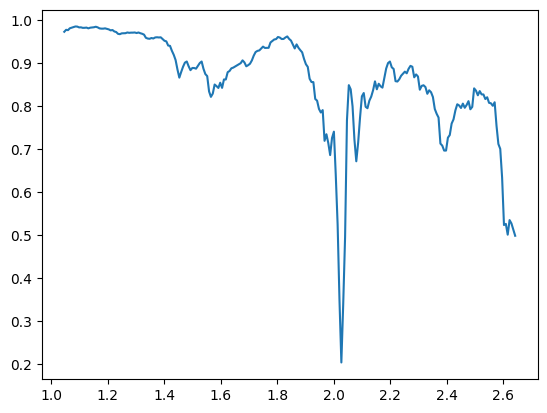

In [ ]:
plt.plot(df_W['Wavelength'], df_mineral.T[1], label='General')

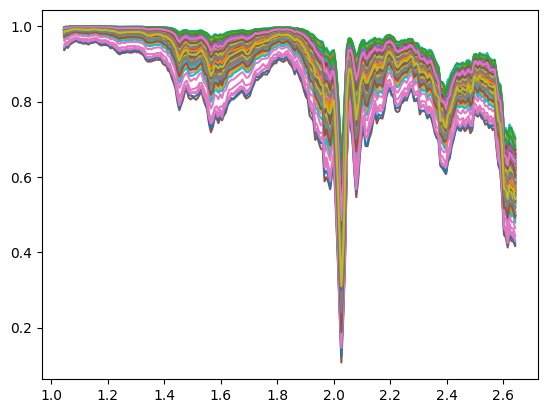

In [ ]:
for id in range(0, samples - 1):
  plt.plot(df_W['Wavelength'], df_mineral.T[id], label='After Repeated Smoothing')

plt.show()

# PreProcessing Steps on the data



Savitzky-Golay Filter

In [ ]:
def SG(df_sg_temp):
  #Column to filter value is the column value
  window_size = 11
  poly_order = 2
  df_sg_temp = savgol_filter(df_sg_temp, window_size, poly_order)
  return df_sg_temp

Spike Removal

In [ ]:
#Function for Spike removal
def SR(sr_temp):
  window_size = 5
  threshold = 0.5

  windowCv = []
  windowMean = []

  for i in range(len(sr_temp)):
      if i<int(window_size/2):
          thisCv = np.std(sr_temp[:i+int(window_size/2)+1])/np.mean(sr_temp[:i+int(window_size/2)+1])
          thisMean = np.mean(sr_temp[:i+int(window_size/2)+1])

      elif len(sr_temp)-1-i<int(window_size/2):
          thisCv = np.std(sr_temp[i-int(window_size/2):])/np.mean(sr_temp[i-int(window_size/2):])
          thisMean = np.mean(sr_temp[i-int(window_size/2):])
  
      else:
          thisCv = np.std(sr_temp[i-int(window_size/2):i+int(window_size/2)+1])/np.mean(sr_temp[i-int(window_size/2):i+int(window_size/2)+1])
          thisMean = np.mean(sr_temp[i-int(window_size/2):i+int(window_size/2)+1])

      windowCv.append(thisCv)
      windowMean.append(thisMean)

  windowCv = np.array(windowCv)   
  windowMean = np.array(windowMean)
  cutoff = np.mean(windowCv) + threshold * (np.max(windowCv) - np.mean(windowCv))
  sr_temp_spectra = np.where(windowCv > cutoff, windowMean, sr_temp)

  return sr_temp_spectra

Spectra Standardization

In [ ]:
def getStandardScaledSpectra(spectra):
    
    targetSpectra = spectra.reshape(-1,1)
    scaler = StandardScaler()
    targetSpectra = scaler.fit_transform(targetSpectra)
    targetSpectra = (targetSpectra.reshape(1,-1))[0]
    
    return targetSpectra

def getStandardScaledData(data, mask=None):
    
    if mask is None: 
      mask = np.full(data.shape, False).ravel()

    Ndata = np.ones(data.shape)
    
    for i in range(data.shape[0]):
        if mask[i]: 
          continue
        
        Ndata[i] = getStandardScaledSpectra(data[i])
    
    return np.array(Ndata)

In [ ]:
L = len(df_mica.columns)
df_mica

,Ratioed I/F Corrected
0,1.12705
1,1.12502
2,1.12372
3,1.12280
4,1.12040
...,...
235,0.32271
236,0.31062
237,0.30549
238,0.30618


Calling the functions

In [ ]:
df_SG = df_mica.copy()

# Savitzky-Golay filter
df_SG['Ratioed I/F Corrected'] = SG(df_SG['Ratioed I/F Corrected'])

df_SG

,Ratioed I/F Corrected
0,1.126817
1,1.125241
2,1.123729
3,1.122280
4,1.120896
...,...
235,0.321759
236,0.307683
237,0.301353
238,0.302769


In [ ]:
df_spike = df_SG.copy()

# Spike Removal
for i in range(0, L):
  df_spike['Ratioed I/F Corrected'] = SR(df_spike['Ratioed I/F Corrected'].to_numpy())

df_spike

,Ratioed I/F Corrected
0,1.126817
1,1.125241
2,1.123729
3,1.122280
4,1.120896
...,...
235,0.321759
236,0.307683
237,0.301353
238,0.302769


In [ ]:
df_standardSpectra = df_spike.copy()

# Spectra Standardization
for i in range(0, L):
  df_standardSpectra['Ratioed I/F Corrected'] = getStandardScaledSpectra(df_spike['Ratioed I/F Corrected'].to_numpy())

In [ ]:
# For minerals
for i in range (0, samples):
  df_mineral.iloc[i] = SG(df_mineral.iloc[i])
  df_mineral.iloc[i] = SR(df_mineral.iloc[i].to_numpy())
  df_mineral.iloc[i] = getStandardScaledSpectra(df_mineral.iloc[i].to_numpy())

In [ ]:
df_mineral

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.838295,0.852073,0.863706,0.873195,0.880540,0.885740,0.888123,0.889379,0.887457,0.885235,...,-1.361678,-1.860536,-2.337104,-2.741227,-3.023908,-3.224153,-3.345040,-3.386569,-3.348739,-3.231552
1,0.976500,1.003547,1.026278,1.044694,1.058794,1.068578,1.072420,1.074351,1.070807,1.065015,...,-1.196103,-1.645154,-2.074189,-2.441013,-2.685736,-2.870458,-2.987103,-3.035669,-3.016157,-2.928569
2,0.848946,0.864624,0.877837,0.888585,0.896869,0.902687,0.904872,0.906186,0.904400,0.901429,...,-1.320139,-1.816031,-2.283414,-2.679969,-2.940676,-3.143144,-3.271305,-3.325158,-3.304703,-3.209940
3,0.786020,0.797280,0.806836,0.814689,0.820836,0.825280,0.827488,0.828735,0.827716,0.826156,...,-1.410920,-1.929504,-2.352415,-2.851450,-3.142069,-3.365923,-3.514323,-3.587271,-3.584765,-3.506806
4,0.729730,0.736996,0.743180,0.748279,0.752295,0.755229,0.756615,0.757553,0.756999,0.756175,...,-1.658443,-2.113531,-2.558554,-3.083251,-3.371415,-3.595280,-3.736688,-3.795641,-3.772136,-3.666176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.818755,0.831970,0.843154,0.852309,0.859435,0.864531,0.866941,0.868242,0.866910,0.864594,...,-1.384980,-1.900311,-2.387655,-2.805825,-3.072623,-3.290616,-3.433788,-3.502137,-3.495666,-3.414372
196,0.789575,0.800114,0.809058,0.816408,0.822164,0.826326,0.828285,0.829646,0.828387,0.826891,...,-1.433625,-1.972459,-2.409320,-2.925038,-3.232939,-3.450406,-3.583279,-3.631559,-3.595246,-3.474339
197,0.860762,0.876277,0.889368,0.900034,0.908276,0.914094,0.916517,0.918016,0.916179,0.913339,...,-1.337945,-1.835248,-2.312391,-2.732770,-3.008047,-3.216198,-3.349141,-3.406877,-3.389404,-3.296723
198,0.900217,0.920081,0.936853,0.950532,0.961119,0.968614,0.971918,0.973895,0.971130,0.967134,...,-1.283018,-1.778205,-2.253202,-2.662375,-2.921475,-3.121345,-3.245724,-3.294615,-3.268014,-3.165924


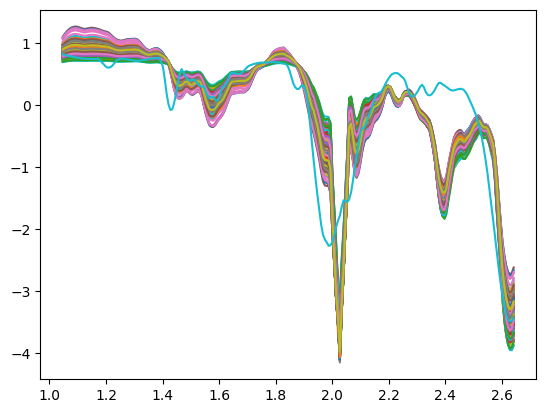

In [ ]:
# Mineral
for id in range(0, samples - 1):
  plt.plot(df_W['Wavelength'], df_mineral.T[id])

# Mica Library
plt.plot(df_W['Wavelength'], df_standardSpectra, label='Mica')

plt.show()

Finding Local Minimas using Find Peaks and Peak Prominence

In [ ]:
# Function for finding n prominent local minimas 
def LocMin(data, n_peaks):
  
  # Adjusting data to fit the find peaks algorithm
  y = data.squeeze()

  # Finding the local minimas

  # -y to get inverse curve as peaks finds the local maximas
  peaks, _ = find_peaks(-y)

  # Prominent local minimas
  prominent_peaks = peak_prominences(-y, peaks)

  # Appending the local minimas and their prominence in the curve
  peaks = np.append(peaks, prominent_peaks[0]).reshape(2, len(peaks))

  # Converting to data frame
  df_temp_peaks = pd.DataFrame(peaks).T
  df_temp_peaks[0] = df_temp_peaks[0].astype('int') 

  # Sorting the local minimas based on their prominence
  df_temp_peaks.sort_values([1], ascending = False, ignore_index = True, inplace = True)

  # Dropping to number of local minimas, needed based on their prominence
  df_temp_peaks.drop(df_temp_peaks.index[n_peaks:], inplace=True)

  # Sorting back based on their index
  df_temp_peaks.sort_values([0], ignore_index = True, inplace = True)

  # Naming the columns
  df_temp_peaks.columns = ['Index', 'Prominence']

  return df_temp_peaks['Index']

In [ ]:
# Total number of local minimas needed
total_peaks = 3

Mica Library

In [ ]:
df_peaks_MICA = pd.DataFrame()
    
# Calling the Local Minima function for Mica Library Data
df_peaks_MICA =  pd.DataFrame(LocMin(df_standardSpectra, total_peaks))

In [ ]:
df_peaks_MICA

,Index
0,58
1,83
2,140


In [ ]:
row_list_MICA = df_peaks_MICA['Index'].tolist()
df_MICA_wavl = df_W.iloc[row_list_MICA]
df_MICA_wavl = df_MICA_wavl.T.reset_index(drop=True)
df_MICA_wavl.columns = range(df_MICA_wavl.shape[1])
df_MICA_wavl

,0,1,2
0,1.4277,1.5921,1.9874


Generated Spectra

In [ ]:
df_peaks_mineral = pd.DataFrame(columns = ['Index_1', 'Index_2', 'Index_3'])

In [ ]:
print(type(df_peaks_mineral))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
for i in range(0, samples):
  df_peaks_mineral.loc[i] = np.array(LocMin(df_mineral.T[i], total_peaks)).astype('int') 

In [ ]:
df_peaks_mineral

,Index_1,Index_2,Index_3
0,81,146,202
1,81,146,202
2,80,146,202
3,81,146,201
4,80,146,202
...,...,...,...
195,80,146,202
196,81,146,202
197,81,146,201
198,81,146,202


In [ ]:
df_peaks_mineral['Index_3'].unique()

array([202, 201])

In [ ]:
# df_mineral_wavl = pd.DataFrame(index = np.arange(0, samples), columns = np.arange(0, total_peaks))
df_mineral_wavl = df_peaks_mineral.copy()
df_mineral_wavl.columns = range(df_mineral_wavl.shape[1])

for i in range(0, samples):
  row_list_mineral = df_peaks_mineral.iloc[i].tolist()
  df_mineral_wavl.iloc[i] = np.array(df_W.iloc[row_list_mineral]).ravel()

In [ ]:
df_mineral_wavl

,0,1,2
0,1.5789,2.027,2.3972
1,1.5789,2.027,2.3972
2,1.5723,2.027,2.3972
3,1.5789,2.027,2.3905
4,1.5723,2.027,2.3972
...,...,...,...
195,1.5723,2.027,2.3972
196,1.5789,2.027,2.3972
197,1.5789,2.027,2.3905
198,1.5789,2.027,2.3972


In [ ]:
j = 0
df_MICA_wavl[j][0]

1.4277

In [ ]:
df_mineral_wavl[1][0]

2.027

In [ ]:
df_analysis = df_mineral_wavl.copy()

for i in range(0, samples):
  for j in range(0, total_peaks):
    df_analysis[j][i] = abs(df_mineral_wavl[j][i] - df_MICA_wavl[j][0])

In [ ]:
df_analysis

,0,1,2
0,0.1512,0.4349,0.4098
1,0.1512,0.4349,0.4098
2,0.1446,0.4349,0.4098
3,0.1512,0.4349,0.4031
4,0.1446,0.4349,0.4098
...,...,...,...
195,0.1446,0.4349,0.4098
196,0.1512,0.4349,0.4098
197,0.1512,0.4349,0.4031
198,0.1512,0.4349,0.4098


In [ ]:
df_mean = df_MICA_wavl.copy()

for i in range(0, total_peaks):
  df_mean[i] = df_analysis[i].mean() 

In [ ]:
df_mean

,0,1,2
0,0.156206,0.435791,0.407589


In [ ]:
df_std = df_MICA_wavl.copy()

for i in range(0, total_peaks):
  df_std[i] = df_analysis[i].std() 

In [ ]:
df_std

,0,1,2
0,0.054893,0.007238,0.003158


#Plotting of Graphs

Mica Library Local Minima Exraction

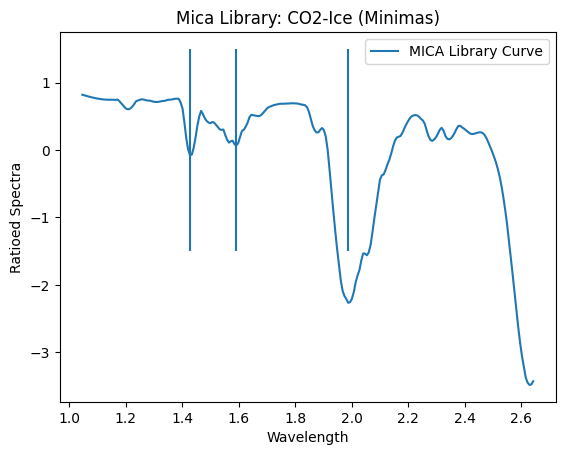

In [ ]:
# Mineral Curve
plt.plot(df_W['Wavelength'], df_standardSpectra, label = 'MICA Library Curve')

# Local Minimas
for i in range(0, len(df_peaks_MICA)):
  plt.vlines(df_W['Wavelength'][df_peaks_MICA['Index'][i]], ymin = -1.5, ymax = 1.5)

plt.xlabel('Wavelength')
plt.ylabel('Ratioed Spectra')
plt.title('Mica Library: CO2-Ice (Minimas)')
plt.legend()

plt.show()

In [ ]:
id = np.random.randint(0, samples - 1)
id

182

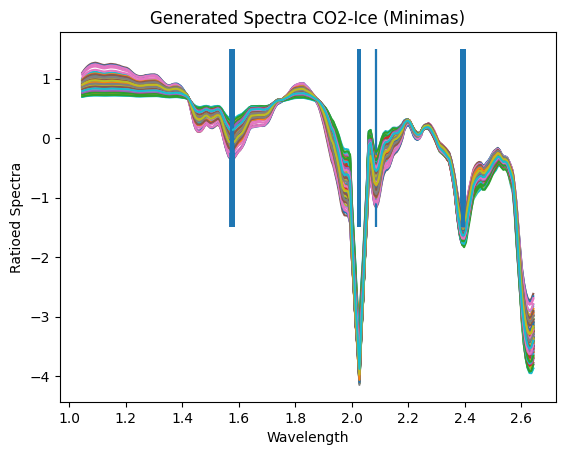

In [ ]:
for id in range(0, samples):
  # Mineral Curve
  plt.plot(df_W['Wavelength'], df_mineral.T[id])
  # Local Minimas
  for i in range(0, len(df_peaks_mineral.loc[id])):
    plt.vlines(df_W['Wavelength'][df_peaks_mineral[f'Index_{i + 1}'][id]], ymin = -1.5, ymax = 1.5)

plt.xlabel('Wavelength')
plt.ylabel('Ratioed Spectra')
plt.title('Generated Spectra CO2-Ice (Minimas)')

plt.show()

In [ ]:
# locmin.to_csv("/content/drive/MyDrive/Data and Resources for Major Project/Mica_Minimas/PHS_19_Min.csv",index=False)

In [ ]:
# df_standardSpectra=df_standardSpectra.T
# df_standardSpectra.to_csv("/content/drive/MyDrive/Data and Resources for Major Project/Pre_Processed_Minerals/Jarsosite_9_T.csv",index=False)